# Loading Fashion-mnist Dataset 

In [3]:
import sys
sys.path.append('e:/hcmus/5th-semester/PRML-Lab01-classification-with-machine-learning/utils')

import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Data Processing and Exploratory Data Analysis

In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explore Data Characteristics

In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"Type of X_train: {type(X_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of X_test: {type(X_test)}")
print(f"Type of X_test: {type(X_test)}")

print(f"Data type of X_train: {X_train.dtype}")
print(f"Data type of y_train: {y_train.dtype}")

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Data type of X_train: uint8
Data type of y_train: uint8


In [6]:
label_distribution = dict(zip(*np.unique(y_train, return_counts=True)))
formatted_distribution = {int(k): int(v) for k, v in label_distribution.items()}

print(f'Label distribution: {formatted_distribution}')


Label distribution: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


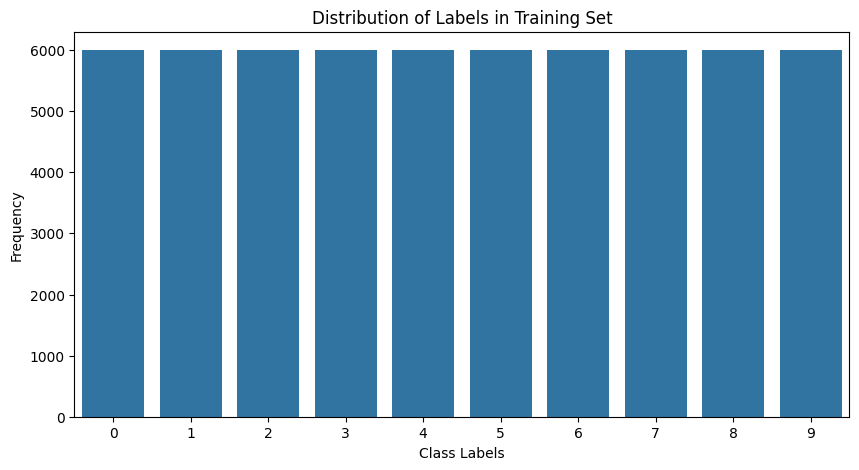

In [7]:
y_train_df = pd.DataFrame(y_train, columns=['Labels'])

plt.figure(figsize=(10, 5))
sns.countplot(x='Labels', data=y_train_df)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

### 2. Show sample image

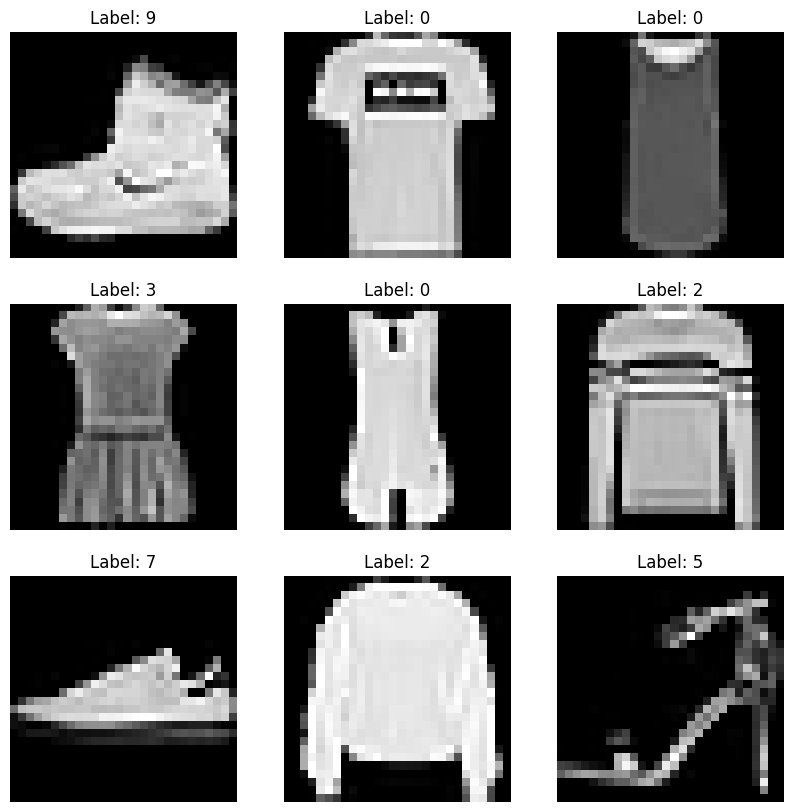

In [8]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

### 3. Handle Missing Data

In [9]:
print(f'Number of NaNs in training data: {np.isnan(X_train).sum()}')
print(f'Number of NaNs in testing data: {np.isnan(X_test).sum()}')

Number of NaNs in training data: 0
Number of NaNs in testing data: 0


### 4. Pixel value distribution

Mean pixel value: 72.94035223214286
Standard deviation: 90.02118235130519


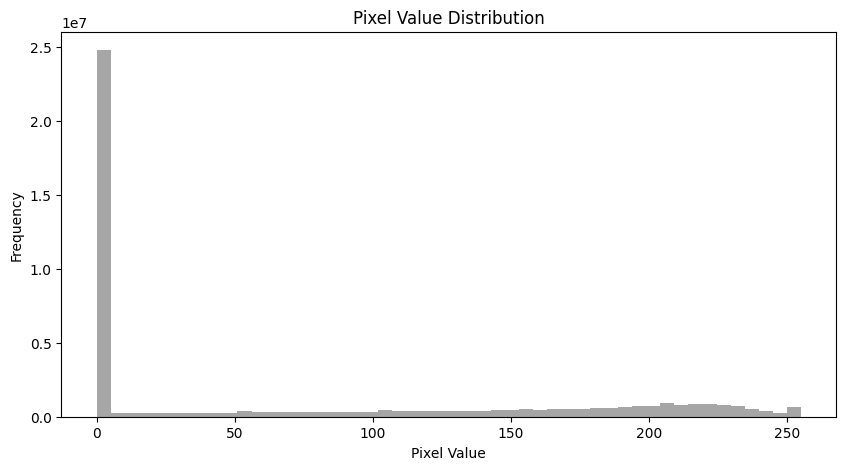

In [10]:
print(f'Mean pixel value: {X_train.mean()}')
print(f'Standard deviation: {X_train.std()}')

plt.figure(figsize=(10, 5))
plt.hist(X_train.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


### 5. Perform Data Transformation

In [11]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


Mean pixel value: 0.28604018688201904
Standard deviation: 0.353023886680603


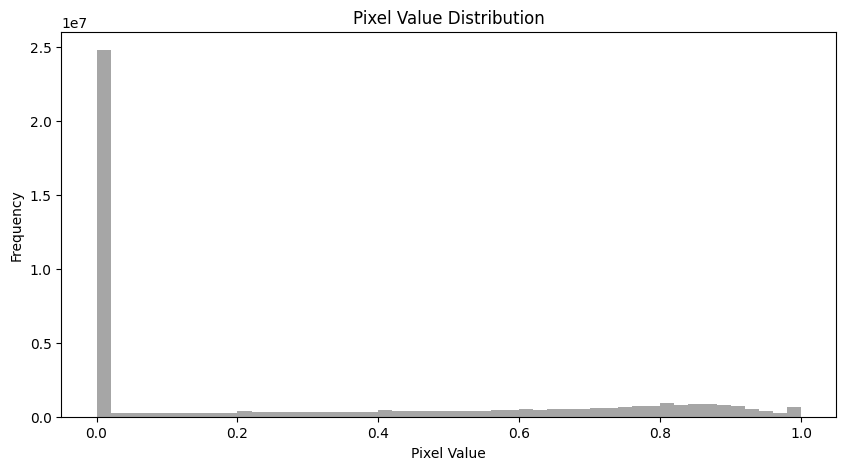

In [12]:
print(f'Mean pixel value: {X_train.mean()}')
print(f'Standard deviation: {X_train.std()}')

plt.figure(figsize=(10, 5))
plt.hist(X_train.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
print("Image dimensions in X_train:", X_train.shape[1:])

Image dimensions in X_train: (784,)


### 6. Handling Outlier

In [14]:
# Z-score
z_scores = np.abs(stats.zscore(X_train.reshape(X_train.shape[0], -1)))
outliers_z = np.where(z_scores > 3)

# IQR
Q1 = np.percentile(X_train, 25)
Q3 = np.percentile(X_train, 75)
IQR = Q3 - Q1
outliers_iqr = X_train[(X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))]

print(f'Number of outliers detected using Z-score: {len(outliers_z[0])}')
print(f'Number of outliers detected using IQR: {np.count_nonzero(outliers_iqr)}')


Number of outliers detected using Z-score: 351722
Number of outliers detected using IQR: 0


## 7. Save Dataset

In [15]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)